<a href="https://colab.research.google.com/github/sahrul3114/Case-Study-Clustering-Analysis-Association-Rule/blob/main/CP_02_Data_Mining_Kelompok_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASE STUDY 2 - MixITup Ice Cream

Group I

Lecturer : Dr. Taufik Sutanto, MScTech

Grup Member :

- Nia Amalia  (11230940000012)
- Syahrul Akbar Ramdhani (11230940000027)
- Annisa Intan Nazila (11230940000031)
- Muhammad Amar Primus Firdaus (11230940000067)

# LOAD DATA

In [1099]:
url = 'https://raw.githubusercontent.com/sahrul3114/Case-Study-Clustering-Analysis-Association-Rule/main/Case-Study-02-MixITup.xlsx'

In [1100]:
import pandas as pd
df = pd.read_excel(url, sheet_name=2)
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


# EXPLORATORY DATA ANALYSES

In [1101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [1102]:
import re
import pandas as pd

df['Umur'] = df['Umur'].astype(str).apply(lambda x: re.sub(r'[^0-9]', '', x))
df['Umur'] = pd.to_numeric(df['Umur'], errors='coerce')
df['Umur'] = df['Umur'].astype('int64')

df['Menikah'] = pd.to_numeric(df['Menikah'], errors='coerce').astype('Int64')
df['Promo'] = pd.to_numeric(df['Promo'], errors='coerce').astype('Int64')

In [1103]:
df.head(10)

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
5,106,Wanita,33,29098360,95,1,Depok,0,Senin,0
6,107,Pria,27,21311475,56,1,Jakarta,1,Senin,5
7,108,Wanita,24,2049180,77,1,Depok,1,Senin,3
8,109,Wanita,32,13524590,47,1,Jakarta,2,Selasa,6
9,110,Wanita,21,19262295,42,1,Jakarta,2,Senin,4


In [1104]:
print("== Nilai Unique Kolom Favorit Flavour ==")
display(df['FavFlavor'].value_counts())
print("== Nilai Unique Kolom Kota ==\n")
display(df['Kota'].value_counts())
print("== Nilai Unique Kolom Promo == \n")
display(df['Menikah'].value_counts())
print("== Nilai Unique Kolom Jenis Kelamin == \n")
display(df['Jenis Kelamin'].value_counts())
print("== Nilai Unique Kolom Umur == \n")
display(df['Umur'].value_counts())
print("== Nilai Unique Kolom Promo == \n")
display(df['Promo'].value_counts())
print("== Nilai Unique Kolom skor-pengeluaran == \n")
display(df['skor-pengeluaran'].value_counts())
print("== Nilai Unique Kolom ID == \n")
display(df['ID'].value_counts())
print("== Nilai Unique Kolom HariFav == \n")
display(df['HariFav'].value_counts())
print("== Nilai Unique Kolom Pendapatan-per-bulan == \n")
display(df['Pendapatan-per-bulan'].value_counts())

== Nilai Unique Kolom Favorit Flavour ==


,count
FavFlavor,
0,40
2,20
6,20
3,20
7,20
5,20
1,20
4,20
8,19


== Nilai Unique Kolom Kota ==



,count
Kota,
Jakarta,87
Depok,59
Tangerang,53
JJakarta,1


== Nilai Unique Kolom Promo == 



,count
Menikah,
1,160
0,26


== Nilai Unique Kolom Jenis Kelamin == 



,count
Jenis Kelamin,
Wanita,109
Pria,86
-,1


== Nilai Unique Kolom Umur == 



,count
Umur,
32,11
35,9
19,8
49,8
31,8
47,7
30,7
36,6
48,6


== Nilai Unique Kolom Promo == 



,count
Promo,
1,86
3,50
2,43
0,14
5,1


== Nilai Unique Kolom skor-pengeluaran == 



,count
skor-pengeluaran,
42,8
55,7
73,6
46,6
52,5
...,...
63,1
85,1
12,1


== Nilai Unique Kolom ID == 



,count
ID,
101,1
102,1
103,1
104,1
105,1
...,...
296,1
297,1
298,1


== Nilai Unique Kolom HariFav == 



,count
HariFav,
Senin,66
Sabtu,54
Minggu,43
Selasa,21
Kamis,6
Rabu,5
Jumat,5


== Nilai Unique Kolom Pendapatan-per-bulan == 



,count
Pendapatan-per-bulan,
15983606,12
25819672,12
13524590,6
29508196,6
19262295,6
...,...
31967213,2
24590163,2
43032786,2


In [1105]:
df.isnull().sum()

,0
ID,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,14
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [1106]:
df.describe()

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,FavFlavor
count,200.000000,200.000000,2.000000e+02,200.00000,186.0,194.0,200.000000
mean,200.500000,37.355000,1.867213e+07,50.47000,0.860215,1.685567,3.605000
std,57.879185,11.992417,1.076423e+07,26.07101,0.3477,0.970603,2.743466
min,101.000000,2.000000,0.000000e+00,1.00000,0.0,0.0,0.000000
25%,150.750000,28.750000,1.086066e+07,34.75000,1.0,1.0,1.000000
50%,200.500000,36.000000,1.905738e+07,50.00000,1.0,1.0,3.500000
75%,250.250000,48.000000,2.581967e+07,73.00000,1.0,3.0,6.000000
max,300.000000,60.000000,5.000000e+07,101.00000,1.0,5.0,9.000000


In [1107]:
df.duplicated().sum()

np.int64(0)

In [1108]:
import numpy as np

Kolom_Numerik = ['Umur', 'skor-pengeluaran', 'Pendapatan-per-bulan']

for col in Kolom_Numerik:
    print(f"Checking outliers for column: {col}")
    # Hitung Q1, Q3, dan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Cek data outlier
    outlier = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]

    # Tampilkan hasil
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Batas bawah: {batas_bawah}")
    print(f"Batas atas: {batas_atas}")
    print("\nData outlier:")
    display(outlier)
    print("-" * 30) # Separator for clarity

Checking outliers for column: Umur
Q1: 28.75
Q3: 48.0
IQR: 19.25
Batas bawah: -0.125
Batas atas: 76.875

Data outlier:


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


------------------------------
Checking outliers for column: skor-pengeluaran
Q1: 34.75
Q3: 73.0
IQR: 38.25
Batas bawah: -22.625
Batas atas: 130.375

Data outlier:


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


------------------------------
Checking outliers for column: Pendapatan-per-bulan
Q1: 10860655.0
Q3: 25819672.0
IQR: 14959017.0
Batas bawah: -11577870.5
Batas atas: 48258197.5

Data outlier:


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
66,167,Pria,30,50000000,83,1,Depok,1,Sabtu,3
102,203,Pria,32,50000000,18,<NA>,Tangerang,3,Senin,6


------------------------------


VISUALISASI


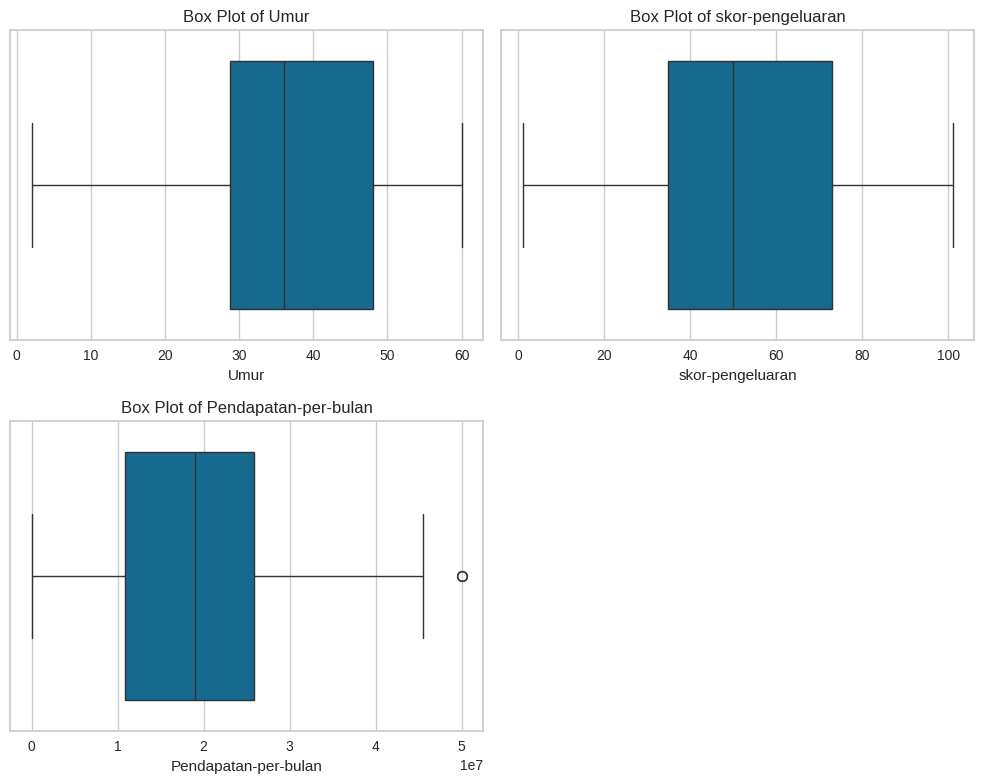

In [1109]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil hanya kolom numerik
n_cols = 2 # jumlah grafik per baris
n_rows = math.ceil(len(Kolom_Numerik) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(Kolom_Numerik, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

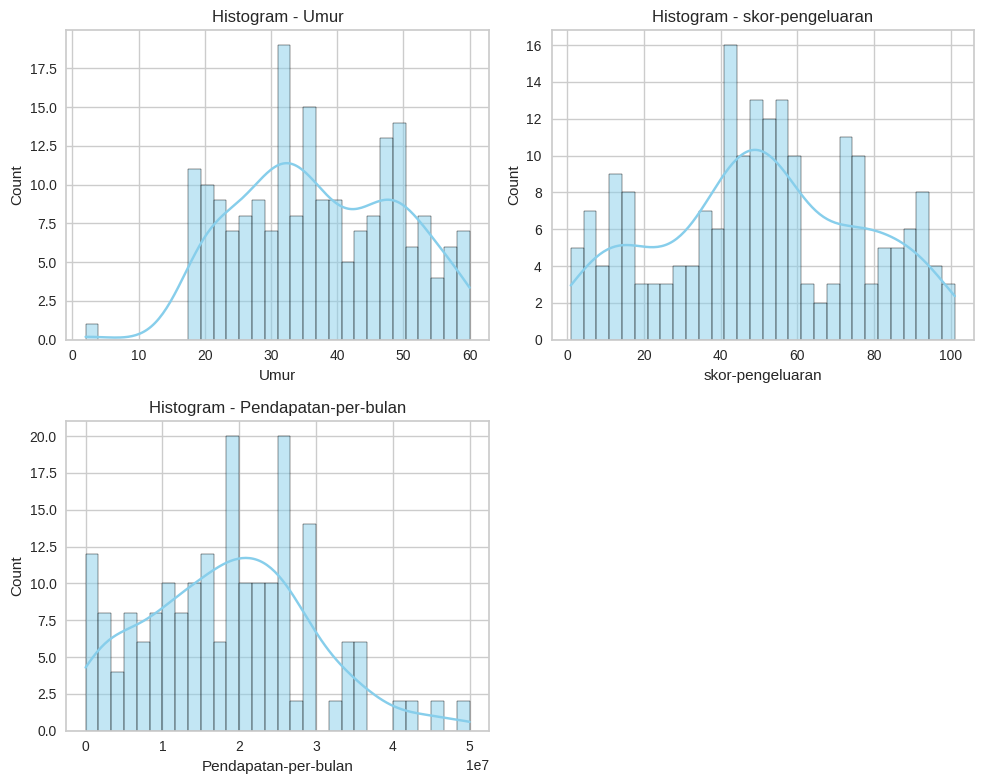

In [1110]:
n_cols = 2 # jumlah grafik per baris
n_rows = math.ceil(len(Kolom_Numerik) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(Kolom_Numerik, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Histogram - {col}")

plt.tight_layout()
plt.show()

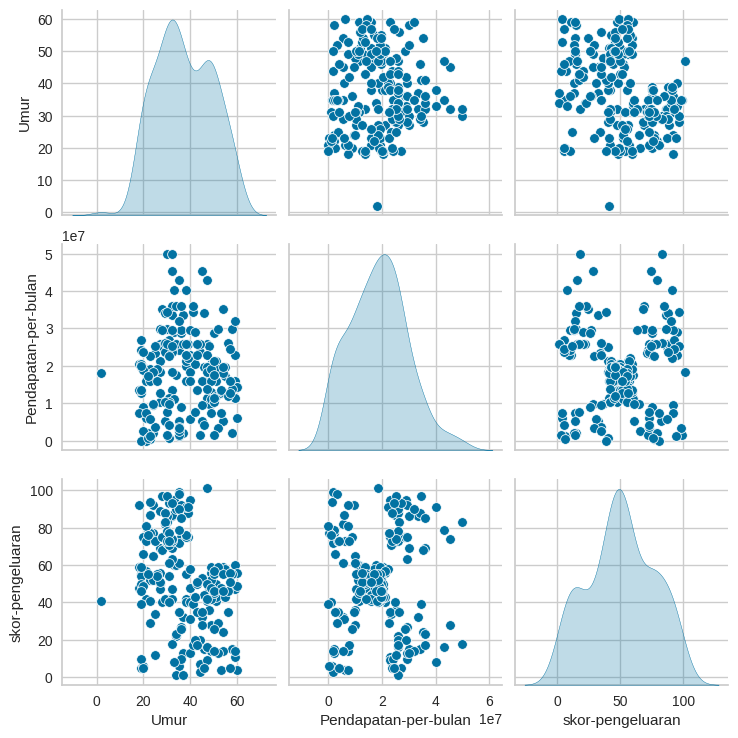

In [1111]:
sns.pairplot(df[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']], diag_kind='kde')
plt.show()

# PRE-PROCESSING

## Cleaning

In [1112]:
df = df.copy()

In [1113]:
df['Jenis Kelamin'].unique()

array(['Wanita', 'Pria', nan, '-'], dtype=object)

In [1114]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace('-', np.nan)

In [1115]:
df['Jenis Kelamin'].unique()

array(['Wanita', 'Pria', nan], dtype=object)

In [1116]:
df['Jenis Kelamin'].isna().sum()

np.int64(5)

In [1117]:
df = df.dropna(subset = ['Jenis Kelamin'])

In [1118]:
df['Jenis Kelamin'].isna().sum()

np.int64(0)

In [1119]:
df['Menikah'].unique()

<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64

In [1120]:
df[df['Menikah'].isna()]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
15,116,Wanita,51,11885245,50,<NA>,Jakarta,1,Minggu,2
33,134,Wanita,38,21311475,40,<NA>,Jakarta,2,Selasa,7
42,143,Pria,39,25819672,88,<NA>,Depok,1,Minggu,0
82,183,Wanita,31,27049180,93,<NA>,Depok,0,Selasa,0
90,191,Wanita,36,29508196,27,<NA>,Tangerang,3,Minggu,5
97,198,Wanita,51,21311475,43,<NA>,Jakarta,2,Minggu,3
102,203,Pria,32,50000000,18,<NA>,Tangerang,3,Senin,6
105,206,Pria,35,3688524,35,<NA>,Tangerang,2,Senin,6
126,227,Wanita,47,18442622,101,<NA>,Jakarta,2,Minggu,7
134,235,Wanita,35,2459016,35,<NA>,Tangerang,3,Senin,5


In [1121]:
# Dilihat berdasarkan Umur kita Imputasi kolom 'Menikah' dengan 1 = Menikah
df['Menikah'] = df['Menikah'].fillna(1)

In [1122]:
df.isna().sum()

,0
ID,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [1123]:
df['Umur'].unique()

array([49, 32, 51, 19, 38, 33, 27, 24, 21, 31, 36, 46, 60, 58, 47, 45, 22,
       18, 59, 44, 39, 35, 20, 30, 23, 48, 37, 40, 34, 41, 53, 54, 28, 55,
       25, 50, 42, 29, 43, 52,  2, 56, 26, 57])

In [1124]:
df = df[df['Umur'] != 2]

In [1125]:
df['skor-pengeluaran'].unique()

array([ 52,  86,  41,  55,  42,  95,  56,  77,  47,  54,  92,  15,   4,
        50,  16,  87,  32,  79,  59,  60,   7,  75,  57,   6,  73,  69,
        40,   5,  89,  49,  13,  88,  48,  36,   3,  31,  39,  46,  83,
        68,  14,  24,  65,  28,  91,  61,  90,  58,  93,  34,  44,  17,
        53,  97,  27,  11,  43,  22,  18,  35,  99,  66,  29,   9,  45,
        23,  10,  82, 101,  51,  20,  72,  71,   1,  81,  98,  26,  76,
        78,  63,  74,  85,  12,   8,  94])

In [1126]:
df = df[df['skor-pengeluaran'] != 101]

In [1127]:
df['skor-pengeluaran'].unique()

array([52, 86, 41, 55, 42, 95, 56, 77, 47, 54, 92, 15,  4, 50, 16, 87, 32,
       79, 59, 60,  7, 75, 57,  6, 73, 69, 40,  5, 89, 49, 13, 88, 48, 36,
        3, 31, 39, 46, 83, 68, 14, 24, 65, 28, 91, 61, 90, 58, 93, 34, 44,
       17, 53, 97, 27, 11, 43, 22, 18, 35, 99, 66, 29,  9, 45, 23, 10, 82,
       51, 20, 72, 71,  1, 81, 98, 26, 76, 78, 63, 74, 85, 12,  8, 94])

In [1128]:
df['Promo'].value_counts()

,count
Promo,
1,85
3,48
2,39
0,14
5,1


In [1129]:
df.groupby('Promo')['skor-pengeluaran'].mean()

,skor-pengeluaran
Promo,
0,93.714286
1,65.988235
2,42.589744
3,15.958333
5,15.000000


In [1130]:
df['Promo'] = df['Promo'].replace(5, 3)

In [1131]:
df[df['Promo'].isna()]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
10,111,Wanita,31,11475409,54,1,Jakarta,<NA>,Senin,6
64,165,Wanita,31,10245901,42,1,Jakarta,<NA>,Minggu,6
95,196,Wanita,30,29918032,86,1,Depok,<NA>,Minggu,5
132,233,Wanita,31,819672,40,1,Jakarta,<NA>,Minggu,6
151,252,Pria,30,34426229,97,1,Depok,<NA>,Sabtu,0
194,295,Wanita,31,9836065,61,1,Jakarta,<NA>,Jumat,3


In [1132]:
promo_means = {
    0.0: 93.714286,
    1.0: 65.988235,
    2.0: 44.05,
    3.0: 15.958333
}

In [1133]:
def imputasi_promo(skor):
    # Hitung selisih absolut skor dengan rata-rata tiap promo
    selisih = {promo: abs(skor - mean) for promo, mean in promo_means.items()}
    # Ambil promo dengan selisih terkecil
    return min(selisih, key=selisih.get)

In [1134]:
df.loc[df['Promo'].isna(), 'Promo'] = df.loc[df['Promo'].isna(), 'skor-pengeluaran'].apply(imputasi_promo)

In [1135]:
df.loc[df['ID'].isin([111, 165, 196, 233, 252, 295]), ['ID', 'skor-pengeluaran', 'Promo']]

,ID,skor-pengeluaran,Promo
10,111,54,2
64,165,42,2
95,196,86,0
132,233,40,2
151,252,97,0
194,295,61,1


In [1136]:
df['Promo'].isna().sum()

np.int64(0)

In [1137]:
df.isna().sum()

,0
ID,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


In [1138]:
df['Kota'].unique()

array(['Jakarta', 'Depok', 'Tangerang', 'JJakarta'], dtype=object)

In [1139]:
df['Kota'] = df['Kota'].replace('JJakarta', 'Jakarta')

In [1140]:
df['Kota'].unique()

array(['Jakarta', 'Depok', 'Tangerang'], dtype=object)

In [1141]:
df['Pendapatan-per-bulan'].unique()

array([13114754, 33606557, 15983606, 12704918, 20081967, 29098360,
       21311475,  2049180, 13524590, 19262295, 11475409, 29508196,
       34016393,  6147540, 11885245, 25819672, 25000000,  5327868,
       23770491, 22950819,  1229508,  9016393,  9426229, 29918032,
       28688524, 27049180, 18442622, 19672131, 11065573, 36065573,
       20491803, 17622950,   409836, 25409836,  1639344,  5737704,
       34426229,  9836065, 10245901, 50000000, 14344262, 35245901,
        7377049, 45491803, 40163934, 17213114, 23360655,  7786885,
       18852459, 22131147,  3688524,  2459016,  3278688, 24180327,
       22540983,   819672, 13934426, 26229508, 31967213, 24590163,
       18032786, 43032786,  4098360,        0])

In [1142]:
# Ambil Pendapatan perbulan nya tidak nol
df = df[df['Pendapatan-per-bulan'] != 0]

In [1143]:
df['Pendapatan-per-bulan'].unique()

array([13114754, 33606557, 15983606, 12704918, 20081967, 29098360,
       21311475,  2049180, 13524590, 19262295, 11475409, 29508196,
       34016393,  6147540, 11885245, 25819672, 25000000,  5327868,
       23770491, 22950819,  1229508,  9016393,  9426229, 29918032,
       28688524, 27049180, 18442622, 19672131, 11065573, 36065573,
       20491803, 17622950,   409836, 25409836,  1639344,  5737704,
       34426229,  9836065, 10245901, 50000000, 14344262, 35245901,
        7377049, 45491803, 40163934, 17213114, 23360655,  7786885,
       18852459, 22131147,  3688524,  2459016,  3278688, 24180327,
       22540983,   819672, 13934426, 26229508, 31967213, 24590163,
       18032786, 43032786,  4098360])

## Scalling

In [1144]:
df.describe()

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,FavFlavor
count,192.000000,192.000000,1.920000e+02,192.000000,192.0,192.0,192.000000
mean,199.776042,37.494792,1.887167e+07,50.541667,0.880208,1.640625,3.614583
std,57.872281,11.725480,1.076872e+07,26.021705,0.325567,0.955017,2.743368
min,101.000000,18.000000,4.098360e+05,1.000000,0.0,0.0,0.000000
25%,150.750000,29.000000,1.106557e+07,34.750000,1.0,1.0,1.000000
50%,198.500000,36.000000,1.926230e+07,50.500000,1.0,1.0,4.000000
75%,250.250000,47.250000,2.581967e+07,73.000000,1.0,3.0,6.000000
max,300.000000,60.000000,5.000000e+07,99.000000,1.0,3.0,9.000000


In [1145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['Pendapatan-per-bulan'] = scaler.fit_transform(df[['Pendapatan-per-bulan']])

In [1146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    192 non-null    int64  
 1   Jenis Kelamin         192 non-null    object 
 2   Umur                  192 non-null    int64  
 3   Pendapatan-per-bulan  192 non-null    float64
 4   skor-pengeluaran      192 non-null    int64  
 5   Menikah               192 non-null    Int64  
 6   Kota                  192 non-null    object 
 7   Promo                 192 non-null    Int64  
 8   HariFav               192 non-null    object 
 9   FavFlavor             192 non-null    int64  
dtypes: Int64(2), float64(1), int64(4), object(3)
memory usage: 16.9+ KB


In [1147]:
Kolom_Kategori = ['Jenis Kelamin', 'Kota', 'HariFav', 'FavFlavor']
df = pd.get_dummies(df, columns=Kolom_Kategori, drop_first=True)

In [1148]:
df

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,Jenis Kelamin_Wanita,Kota_Jakarta,Kota_Tangerang,HariFav_Kamis,...,HariFav_Senin,FavFlavor_1,FavFlavor_2,FavFlavor_3,FavFlavor_4,FavFlavor_5,FavFlavor_6,FavFlavor_7,FavFlavor_8,FavFlavor_9
0,101,49,0.256198,52,1,1,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,102,32,0.669421,86,1,1,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,103,51,0.314050,41,1,2,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,104,19,0.247934,55,0,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,105,38,0.396694,42,1,2,True,True,False,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,31,0.074380,73,1,1,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
196,297,57,0.314050,51,1,1,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
197,298,35,0.859504,79,1,1,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
198,299,23,0.016529,94,1,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# CLUSTERING


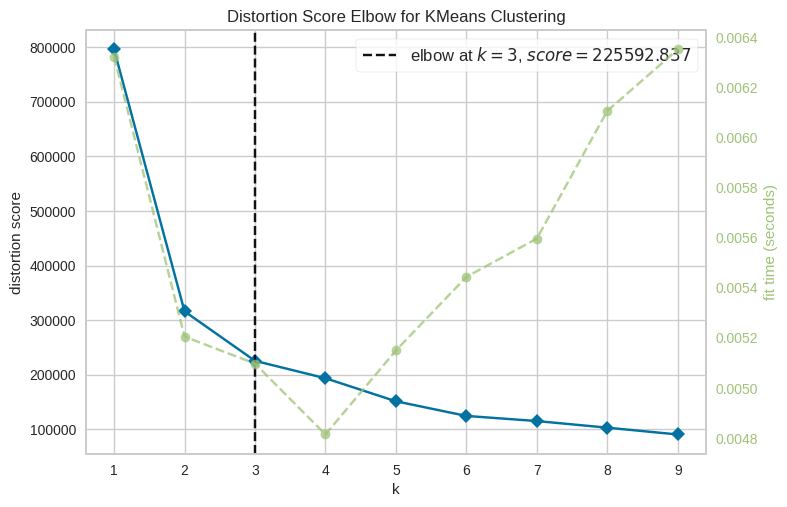

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1149]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [1150]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)

# Mendapatkan label cluster
labels = kmeans.labels_

# Menambahkan hasil cluster ke dataframe
df['Cluster'] = labels

# Menampilkan 5 data teratas
df.head()

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,Jenis Kelamin_Wanita,Kota_Jakarta,Kota_Tangerang,HariFav_Kamis,...,FavFlavor_1,FavFlavor_2,FavFlavor_3,FavFlavor_4,FavFlavor_5,FavFlavor_6,FavFlavor_7,FavFlavor_8,FavFlavor_9,Cluster
0,101,49,0.256198,52,1,1,True,True,False,False,...,False,True,False,False,False,False,False,False,False,2
1,102,32,0.669421,86,1,1,True,False,False,False,...,False,False,False,False,False,True,False,False,False,2
2,103,51,0.314050,41,1,2,False,True,False,False,...,False,False,True,False,False,False,False,False,False,2
3,104,19,0.247934,55,0,1,False,True,False,False,...,False,False,False,False,False,False,True,False,False,2
4,105,38,0.396694,42,1,2,True,True,False,False,...,False,False,False,False,False,False,False,True,False,2


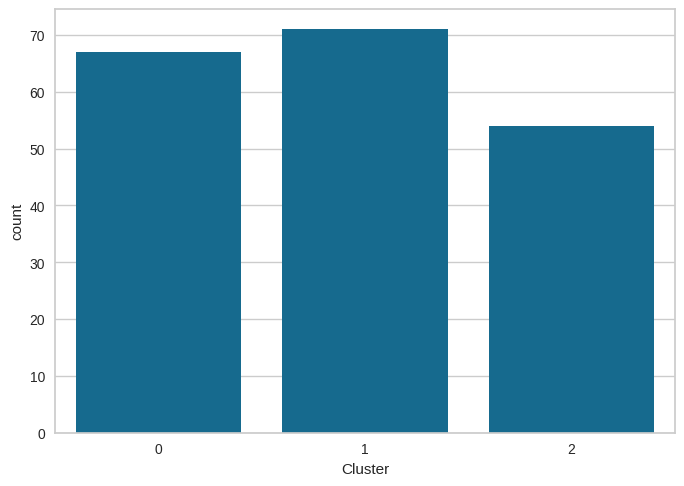

In [1151]:
p = sns.countplot(x=df['Cluster'], data=df)

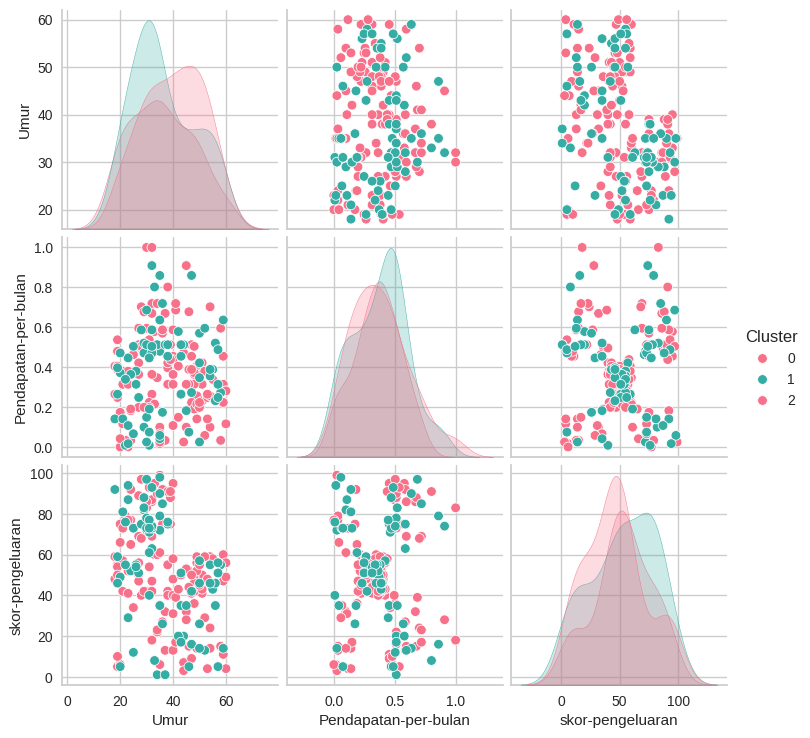

In [1153]:
sns.pairplot(df[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran', 'Cluster']], hue='Cluster', palette='husl')


In [ ]:
df['k-means'] = C_km
  g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','k-means']], \
  hue="k-means", diag_kind="hist", palette="tab10")
